# Regression

**Regression** is a statistical method used to determine the strength and character of the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables).

**Correlation** is associated with regression. It is a statistical measure that expresses the extent to which two variables are linearly related as they change together at a constant rate.

## Linear Regression
This is a set of methods for modelling the relationship between one or more independent variables and a dependent variable. This is used in machine learning for prediction.

Let us assume that the relationship between the independent variables $\mathbf{x}$ and dependent variable $y$ is linear, such that y can be expressed as weighted sum of elements in $\mathbf{x}$, given some noise on the observations. Let us also assume the noise is according to Gaussion distribution.

Having $n$ as number of examples in dataset and $i$ as index for each input we will have $\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}]^\top$ and corresponding label as $y^{(i)}$

The Normal Equation

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor, LinearRegression

## Using generated data

In [2]:
np.random.seed(42)

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

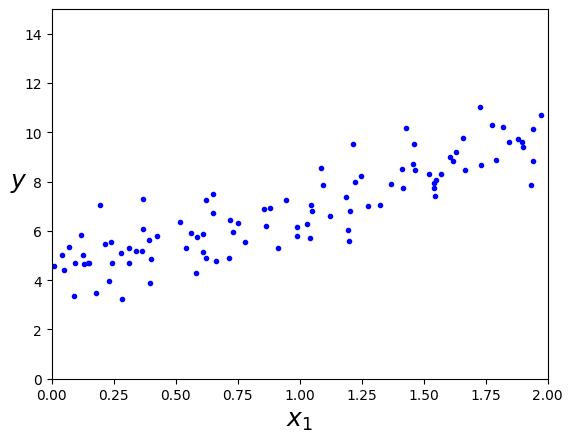

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

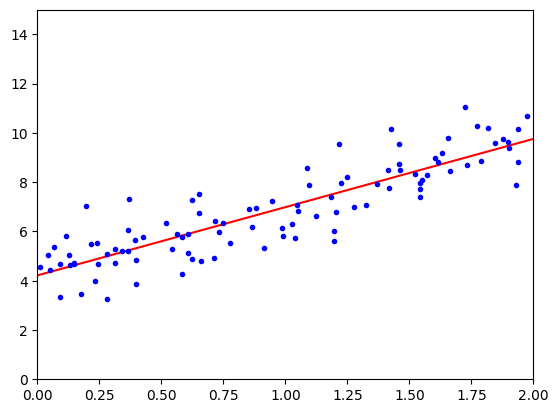

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

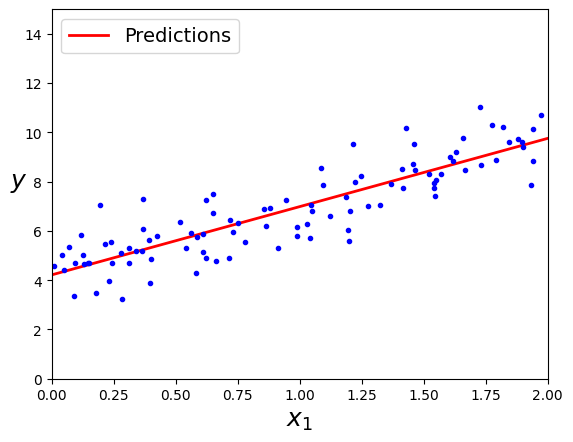

In [8]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

## Get Real Data

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [21]:
dataset = pd.read_csv('../xdata/headbrain.csv')
dataset.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [22]:
size = dataset['Head Size(cm^3)']
weight = dataset['Brain Weight(grams)']

print(size)
print(weight)

0      4512
1      3738
2      4261
3      3777
4      4177
       ... 
232    3214
233    3394
234    3233
235    3352
236    3391
Name: Head Size(cm^3), Length: 237, dtype: int64
0      1530
1      1297
2      1335
3      1282
4      1590
       ... 
232    1110
233    1215
234    1104
235    1170
236    1120
Name: Brain Weight(grams), Length: 237, dtype: int64


## Visualize Data

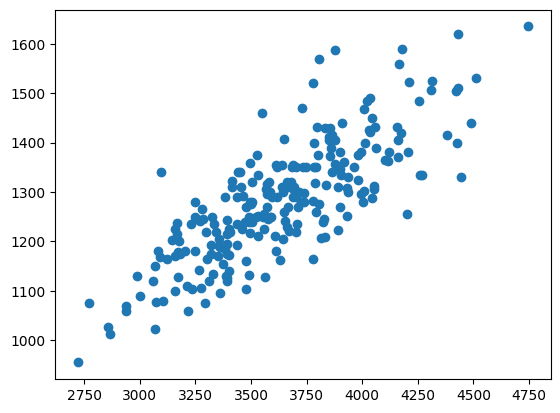

In [23]:
plt.scatter(size, weight)
plt.show()

Converting dataframes to NumPy

In [24]:
X = np.array(size).reshape(-1,1)
y = np.array(weight).reshape(-1,1)

## Model Training

In [25]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

## Prediction

In [29]:
print('Prediction by the model:\t', model.predict([[2000]]))

Prediction by the model:	 [[852.43210003]]


## Performance

In [26]:
regression_model_mse = mean_squared_error(X,y)
print('Mean Squared Error:\t',math.sqrt(regression_model_mse))
print("R squared value\t\t",model.score(X,y))

Mean Squared Error:	 2367.495611943946
R squared value		 0.639311719957


In [27]:
print(model.coef_[0])
print(model.intercept_[0])

[0.26342934]
325.5734210494426


## Visualize Predictions

Text(0, 0.5, 'Brain Weight')

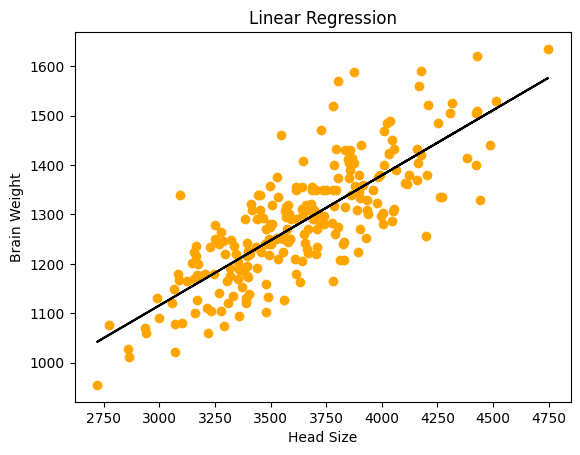

In [28]:
plt.scatter(X,y, color = 'orange')
plt.plot(X,model.predict(X), color = 'black')
plt.title('Linear Regression')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')